In [18]:
from nilearn import datasets
from nilearn.decomposition import CanICA
from nilearn import plotting
from nilearn import image 
from nilearn.decomposition import DictLearning
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [5]:
rest_dataset = datasets.fetch_development_fmri(n_subjects=30)
func_filenames = rest_dataset.func 

In [6]:
canica = CanICA(n_components=20, verbose=10, mask_strategy='template', random_state=0)
canica.fit(func_filenames)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar127_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar001_task-pi

D:\anaconda\envs\mne\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\development_fmri\development_fmri\sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Bokkin Wang\nilearn_data\develop

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished
D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.

D:\anaconda\envs\mne\lib\site-packages\numpy\ma\core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
D:\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


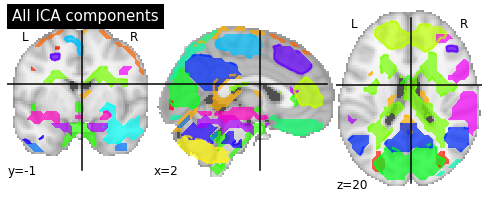

In [9]:
# Plot all ICA components together
plotting.plot_prob_atlas(canica_components_img, title='All ICA components')

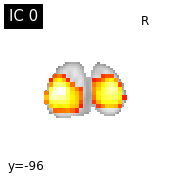

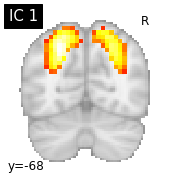

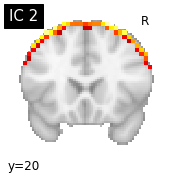

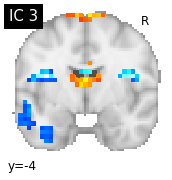

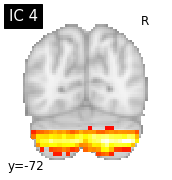

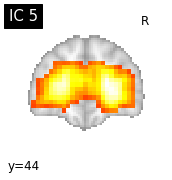

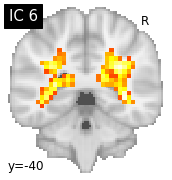

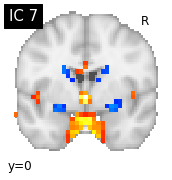

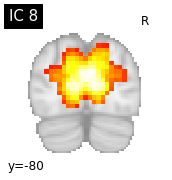

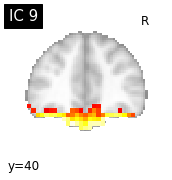

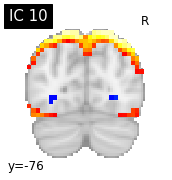

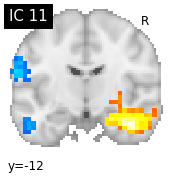

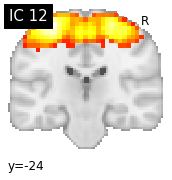

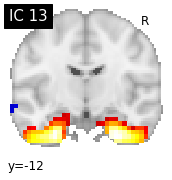

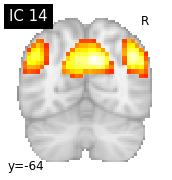

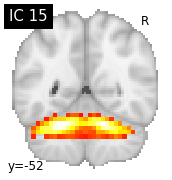

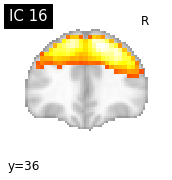

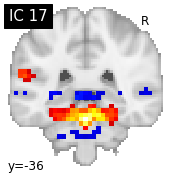

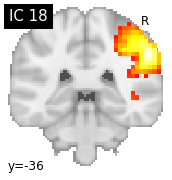

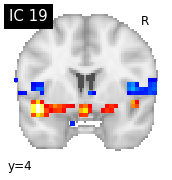

In [14]:
for i, cur_img in enumerate(image.iter_img(canica_components_img)):
    plotting.plot_stat_map(cur_img, display_mode="y", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

In [17]:
dict_learning = DictLearning(n_components=20,
                             random_state=0,
                             n_epochs=1,
                             mask_strategy='template')

print('[Example] Fitting dicitonary learning model')
dict_learning.fit(func_filenames)
print('[Example] Saving results')
# Grab extracted components umasked back to Nifti image.
# Note: For older versions, less than 0.4.1. components_img_
# is not implemented. See Note section above for details.
dictlearning_components_img = dict_learning.components_img_
#dictlearning_components_img.to_filename('dictionary_learning_resting_state.nii.gz')

[Example] Fitting dicitonary learning model


D:\anaconda\envs\mne\lib\site-packages\nilearn\image\resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


[Example] Saving results


D:\anaconda\envs\mne\lib\site-packages\nilearn\image\image.py:1054: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


D:\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
D:\anaconda\envs\mne\lib\site-packages\nilearn\plotting\displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


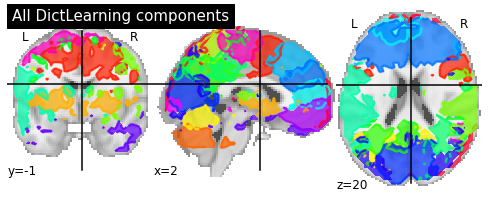

In [19]:
plotting.plot_prob_atlas(dictlearning_components_img,
                title='All DictLearning components')

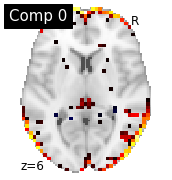

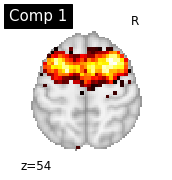

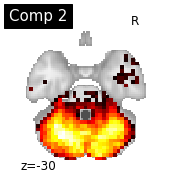

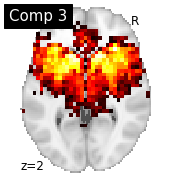

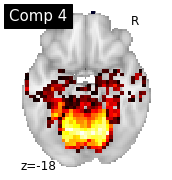

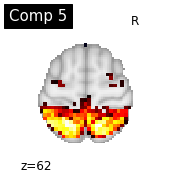

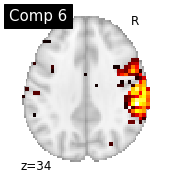

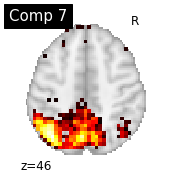

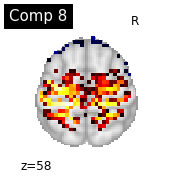

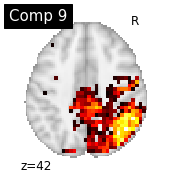

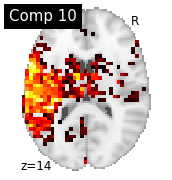

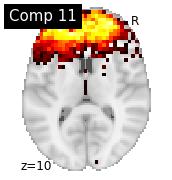

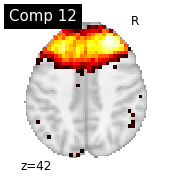

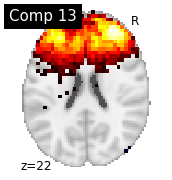

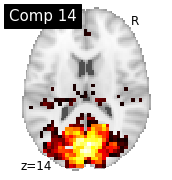

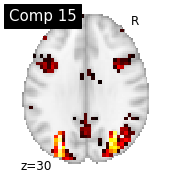

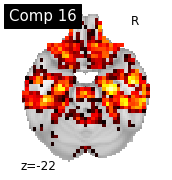

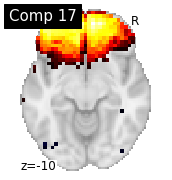

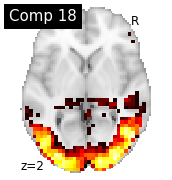

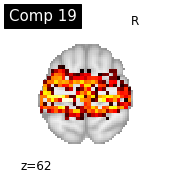

In [20]:
for i, cur_img in enumerate(image.iter_img(dictlearning_components_img)):
    plotting.plot_stat_map(cur_img, display_mode="z", title="Comp %d" % i,
                  cut_coords=1, colorbar=False)

In [21]:
scores = dict_learning.score(func_filenames, per_component=True)

plt.figure(figsize=(4, 4))
positions = np.arange(len(scores))
plt.barh(positions, scores)
plt.ylabel('Component #', size=12)
plt.xlabel('Explained variance', size=12)
plt.yticks(np.arange(20))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()
